In [2]:
#!git clone https://github.com/kaggle/docker-python
    
#!ls
#%cd docker-python

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set up

In [4]:
#!pip install --upgrade pandas

In [5]:
!pip install underthesea

     |████████████████████████████████| 7.5MB 5.0MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 747kB 16.9MB/s 
     |████████████████████████████████| 245kB 37.2MB/s 
     |████████████████████████████████| 753.2MB 21kB/s 
     |████████████████████████████████| 1.3MB 33.7MB/s 
     |████████████████████████████████| 2.9MB 26.8MB/s 
     |████████████████████████████████| 901kB 34.9MB/s 
     |████████████████████████████████| 1.1MB 38.3MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16184 sha256=4506b191cd67b352d1d83abcdb05f76232fae5592868d9f732b0e91df757bb92
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.5.1 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.5.1 which is incompat

In [6]:
!pip install keras

In [7]:
!pip install torch

In [8]:
!pip install transformers

# Main

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(1234)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_log_error
from underthesea import word_tokenize
from sklearn.model_selection import train_test_split
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils
from gensim.models import KeyedVectors

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [10]:
!pip install xlrd

In [11]:
!pip install openpyxl==2.6.0

     |████████████████████████████████| 174kB 5.0MB/s 
  Created wheel for openpyxl: filename=openpyxl-2.6.0-py2.py3-none-any.whl size=243902 sha256=5b8386288242ba3e77f163bc42c1583867eb38d6bf6a4fe590f1603120b9fa92
  Stored in directory: /root/.cache/pip/wheels/5a/de/77/f07186146bd0337342dd8c86fa12441f4f9c59573c51dcce9d
Successfully built openpyxl
  Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [12]:
path= "/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/"
%cd /content/drive/MyDrive/Study/Scocial Media Data Mining/Dataset/UIT-VSMEC/

/content/drive/MyDrive/Study/Scocial Media Data Mining/Dataset/UIT-VSMEC


In [13]:
df_train = pd.read_excel("train_nor_811.xlsx", sheet_name= "Sheet1")
df_dev = pd.read_excel("valid_nor_811.xlsx", sheet_name= "Sheet1")
df_test = pd.read_excel("test_nor_811.xlsx", sheet_name= "Sheet1")

In [14]:
num_labels = len(df_train["Emotion"].unique())
num_labels

7

In [15]:
df_train.Emotion

0           Other
1         Disgust
2         Disgust
3       Enjoyment
4       Enjoyment
          ...    
5543      Disgust
5544        Other
5545        Other
5546    Enjoyment
5547      Sadness
Name: Emotion, Length: 5548, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train["Emotion"])

labels_train_encode = le.transform(df_train["Emotion"])
labels_dev_encode = le.transform(df_dev["Emotion"])
labels_test_encode = le.transform(df_test["Emotion"])

In [17]:
from keras.utils.np_utils import to_categorical
labels_train = to_categorical(labels_train_encode, num_classes= num_labels)
labels_test = to_categorical(labels_test_encode, num_classes= num_labels)
labels_dev = to_categorical(labels_dev_encode, num_classes= num_labels)

In [18]:
len(labels_test)

693

## Remove punctuation

In [19]:
import string
def cleaner_update(text):
    return text.translate(str.maketrans('','', string.punctuation))

In [20]:
clean_train = []
for i in range(0,len(df_train)):
    clean_train.append(cleaner_update(df_train['Sentence'][i]))

len(clean_train)

5548

In [21]:
clean_dev = []
for i in range(0,len(df_dev)):
    clean_dev.append(cleaner_update(df_dev['Sentence'][i]))

len(clean_dev)

686

In [22]:
clean_test = []
for i in range(0,len(df_test)):
    clean_test.append(cleaner_update(df_test['Sentence'][i]))
    
len(clean_test)

693

## Tokenize Words

In [23]:
tokenize_df=[]
for x in clean_test:
    tokenize_df.append(word_tokenize(x))
    
for x in clean_train:
    tokenize_df.append(word_tokenize(x))
    
for x in clean_dev:
    tokenize_df.append(word_tokenize(x))
    
len(tokenize_df) ## >> len= 6927 là kích thước của dataset do tokenize gọp lại của 3 tập

6927

## Count Words

In [24]:
words=[]
for m in range(0,len(tokenize_df)):
    for n in range(0,len(tokenize_df[m])):
        words.append(tokenize_df[m][n])

len(words)

82306

## Visualize frequency of word (used for stopwords)

In [25]:
df_Count = pd.DataFrame(words,columns=['word'])
df_Count['Num']= 1

In [26]:
df_GroupBy=df_Count.groupby('word').count()
df_GroupBy.sort_values('Num',ascending=False,inplace=True)

In [27]:
filename = path + 'vietnamese-stopwords.txt'
data = pd.read_csv(filename,names=['word'])
data

,word
0,a lô
1,a ha
2,ai
3,ai ai
4,ai nấy
...,...
1937,ừ nhé
1938,ừ thì
1939,ừ ào
1940,ừ ừ


In [28]:
list_stopwords = data['word']
myarray = np.asarray(list_stopwords)
myarray

array(['a lô', 'a ha', 'ai', ..., 'ừ ào', 'ừ ừ', 'ử'], dtype=object)

In [29]:
def remove_stopword(text):
    text2=''
    for x in text:
        if x in myarray:
            text2+=""
        else:
            text2+=x+ " "
    return text2

storage=[]
for x in range(0,len(tokenize_df)):
    storage.append(remove_stopword(tokenize_df[x]))
    
print(len(storage))
#print(storage)

6927


## Split data

In [30]:
x_train = pd.Series(clean_train)
y_train = pd.Series(df_train['Emotion'])

x_dev = pd.Series(clean_dev)
y_dev = pd.Series(df_dev['Emotion'])

x_test = pd.Series(clean_test)
y_test = pd.Series(df_test['Emotion'])

print(len(df_train))
print(len(x_train))

5548
5548


# Training build_vocav with 2 method of skipgam and CBOW

In [31]:
def labelize_text_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result

In [32]:
all_x = pd.concat([x_train])
all_x_w2v = labelize_text_ug(all_x, 'all')
len(all_x_w2v)

5548

### CBOW

In [33]:
cores = multiprocessing.cpu_count()
model_ug_cbow = Word2Vec(sg=0, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)

model_ug_cbow.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 5548/5548 [00:00<00:00, 704937.85it/s]


In [34]:
%%time
for epoch in range(30):
    model_ug_cbow.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_cbow.alpha -= 0.002
    model_ug_cbow.min_alpha = model_ug_cbow.alpha

100%|██████████| 5548/5548 [00:00<00:00, 831398.00it/s]


CPU times: user 5.56 s, sys: 90.1 ms, total: 5.65 s
Wall time: 3.67 s


### SG

In [35]:
model_ug_sg = Word2Vec(sg=1, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 5548/5548 [00:00<00:00, 1260836.51it/s]


In [36]:
%%time
for epoch in range(30):
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha

100%|██████████| 5548/5548 [00:00<00:00, 700692.52it/s]


CPU times: user 9.71 s, sys: 107 ms, total: 9.82 s
Wall time: 6.01 s


## Save results

In [37]:
model_ug_cbow.save(path + 'w2v_model_ug_cbow.word2vec')
model_ug_sg.save(path + 'w2v_model_ug_sg.word2vec')

## Get Keyed Vectors

In [38]:
model_ug_cbow = KeyedVectors.load(path + 'w2v_model_ug_cbow.word2vec')
model_ug_sg = KeyedVectors.load(path + 'w2v_model_ug_sg.word2vec')

#### Appending cbow and sg for better result

In [39]:
# Demo
dictions= {}
dictions['a'] = np.append([3, 7], [1, 2])
dictions['b'] = 4
dictions['bb'] = 15
len(dictions)
dictions

{'a': array([3, 7, 1, 2]), 'b': 4, 'bb': 15}

In [40]:
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys(): # model_ug_cbow.wv.index_to_key is all keyed after modelize in dataset
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w]) #model_ug_cbow.wv[w] is a tensor
print('Found %s word vectors.' % len(embeddings_index))

import pickle

# saving
with open('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/VSMEC/embeddings_index.pickle', 'wb') as handle:
    pickle.dump(embeddings_index, handle, protocol=pickle.HIGHEST_PROTOCOL)


embeddings_index['không']

Found 2776 word vectors.


array([ 2.85696715e-01,  3.80927175e-01, -4.06118572e-01,  7.46419251e-01,
        8.44749868e-01, -2.68525958e-01, -5.88483736e-02,  1.25445914e+00,
        2.86980569e-01, -7.84643516e-02,  6.91165403e-02,  8.07504833e-01,
        5.36557660e-02,  3.67430747e-01, -4.26958680e-01, -7.15282321e-01,
       -5.55903614e-01,  3.56200308e-01,  6.20597824e-02,  3.74396026e-01,
        1.21351264e-01, -2.52656698e-01, -8.99986267e-01, -4.30602580e-01,
       -1.11977123e-01, -6.45371139e-01, -4.27837431e-01,  3.35981101e-01,
        1.13329306e-01,  4.43259999e-02, -5.32760501e-01,  5.63918114e-01,
       -3.29842001e-01, -2.67498106e-01, -1.05003610e-01,  2.69556582e-01,
        2.37860326e-02,  6.59882367e-01,  1.79037079e-02, -2.66049001e-02,
        6.68766916e-01, -2.60480165e-01,  3.37926522e-02, -2.04496071e-01,
       -8.36528182e-01, -2.14671224e-01, -3.10881168e-01, -5.70458233e-01,
        3.35372955e-01,  2.25558504e-01, -2.56169558e-01,  4.54358190e-01,
        1.05212823e-01, -

## Vectorize words into numberic (float)

In [41]:
tokenizer = keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
tokenizer.fit_on_texts(x_train)
import pickle

# saving
with open('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/VSMEC/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

x_train

0                   cho mình xin bài nhạc tên là gì với ạ
1       cho đáng đời con quỷ  về nhà lôi con nhà mày r...
2       lo học đi  yêu đương lol gì hay lại thích học ...
3            uớc gì sau này về già vẫn có thể như cụ này 
4       mỗi lần có video của con là cứ coi đi coi lại ...
                              ...                        
5543    đường của nhà cụ hay sao mà cụ cấm người ta đỗ...
5544                               nhìn mặt héo queo luôn
5545    tao đi xe máy mỗi lần muốn để xe đi đâu là phi...
5546                      thích thân hình boss rồi nhan 😌
5547    ước mơ nhỏ nhoi của tao là được làm chị mà khô...
Length: 5548, dtype: object

In [42]:
sequences_digit = tokenizer.texts_to_sequences(x_train)

### Take a max length of vector (reason of all inout have to be in a same size of matrix)

In [43]:
length = []
for x in x_train:
    length.append(len(x.split()))
for x in x_dev:
    length.append(len(x.split()))
for x in x_test:
    length.append(len(x.split()))
    
max(length)

154

In [44]:
x_train_seq = pad_sequences(sequences_digit, maxlen=155)
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (5548, 155)


In [45]:
sequences_val = tokenizer.texts_to_sequences(x_dev)
x_val_seq = pad_sequences(sequences_val, maxlen=155)
print('Shape of data tensor:', x_val_seq.shape)

Shape of data tensor: (686, 155)


In [46]:
sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=155)
print('Shape of data tensor:', x_test_seq.shape)

Shape of data tensor: (693, 155)


# LSTM - CNN

### Validating on DataSet - Dev

In [47]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [48]:
x_train_seq.shape

(5548, 155)

In [49]:
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, concatenate, Activation
from keras.models import Model
from keras import backend as K
from keras.models import Sequential
from keras.layers.embeddings import Embedding

In [50]:
%cd /content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/VSMEC

/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/VSMEC


In [51]:
num_words = 10000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


model_lstm_cnn = Sequential()
e = Embedding(10000, 200, weights=[embedding_matrix], input_length=150, trainable=True)
model_lstm_cnn.add(e)
model_lstm_cnn.add(LSTM(300,return_sequences=True))
model_lstm_cnn.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_lstm_cnn.add(GlobalMaxPooling1D())
model_lstm_cnn.add(Dropout(0.2))
model_lstm_cnn.add(Dense(256, activation='relu'))
model_lstm_cnn.add(Dense(num_labels, activation='sigmoid'))
model_lstm_cnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])
filepath="LSTM_CNN_best_weights.{epoch:02d}-{val_acc:.41f}.hdf5"
# model_lstm_cnn.load_weights("/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/VSMEC/LSTM_CNN_best_weights.06-0.54227405786514282226562500000000000000000.hdf5")
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# history_lstm_cnn=model_lstm_cnn.fit(x_train_seq, labels_train, batch_size=40, epochs=10,
#                      validation_data=(x_val_seq, labels_dev),verbose=2, callbacks=[checkpoint])

In [52]:
model_lstm_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 200)          2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 150, 300)          601200    
_________________________________________________________________
conv1d (Conv1D)              (None, 149, 100)          60100     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1

In [53]:
assert False

AssertionError: ignored

### Test

In [54]:
model_lstm_cnn.load_weights('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/VSMEC/LSTM_CNN_best_weights.06-0.54227405786514282226562500000000000000000.hdf5')

In [55]:
loss_lstm_Cnn, accuracy_lstm_Cnn, f1_score_lstm_Cnn, precision_lstm_Cnn, recall_lstm_Cnn = model_lstm_cnn.evaluate(x_test_seq, labels_test, verbose=0)

In [56]:
print(loss_lstm_Cnn, accuracy_lstm_Cnn, f1_score_lstm_Cnn, precision_lstm_Cnn, recall_lstm_Cnn)

0.33937618136405945 0.5598845481872559 0.555818498134613 0.5765953660011292 0.5378787517547607


In [57]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# Danh gia mo hinh
y_true = labels_test_encode
y_pred_classify = model_lstm_cnn.predict(x_test_seq)
y_pred = y_pred_classify.argmax(axis=-1)

cf = confusion_matrix(y_true, y_pred, labels= pd.Series(y_true).unique())

print(cf)
print("accuracy: " + str(accuracy_score(y_true, y_pred)))
print("F1 - macro: " + str(f1_score(y_true, y_pred, average='macro')))
target_names = pd.Series(y_test).astype(str).unique()
print('Classification report in Training set')
print(classification_report(y_true, y_pred, labels= pd.Series(y_true).unique(), target_names=target_names))

[[ 64   2   6   5   2  18  19]
 [  1  17   2   0   1  11   5]
 [ 12   2  75   4  12  11  16]
 [  2   0   4  31   1   3   5]
 [  3   0   8   3  19   5   2]
 [ 14   6  18   2   3  60  26]
 [ 13   3  14   4   2  35 122]]
accuracy: 0.5598845598845599
F1 - macro: 0.5504537405033828
Classification report in Training set
              precision    recall  f1-score   support

     Sadness       0.59      0.55      0.57       116
    Surprise       0.57      0.46      0.51        37
     Disgust       0.59      0.57      0.58       132
        Fear       0.63      0.67      0.65        46
       Anger       0.47      0.47      0.48        40
       Other       0.42      0.47      0.44       129
   Enjoyment       0.63      0.63      0.63       193

    accuracy                           0.56       693
   macro avg       0.56      0.55      0.55       693
weighted avg       0.56      0.56      0.56       693



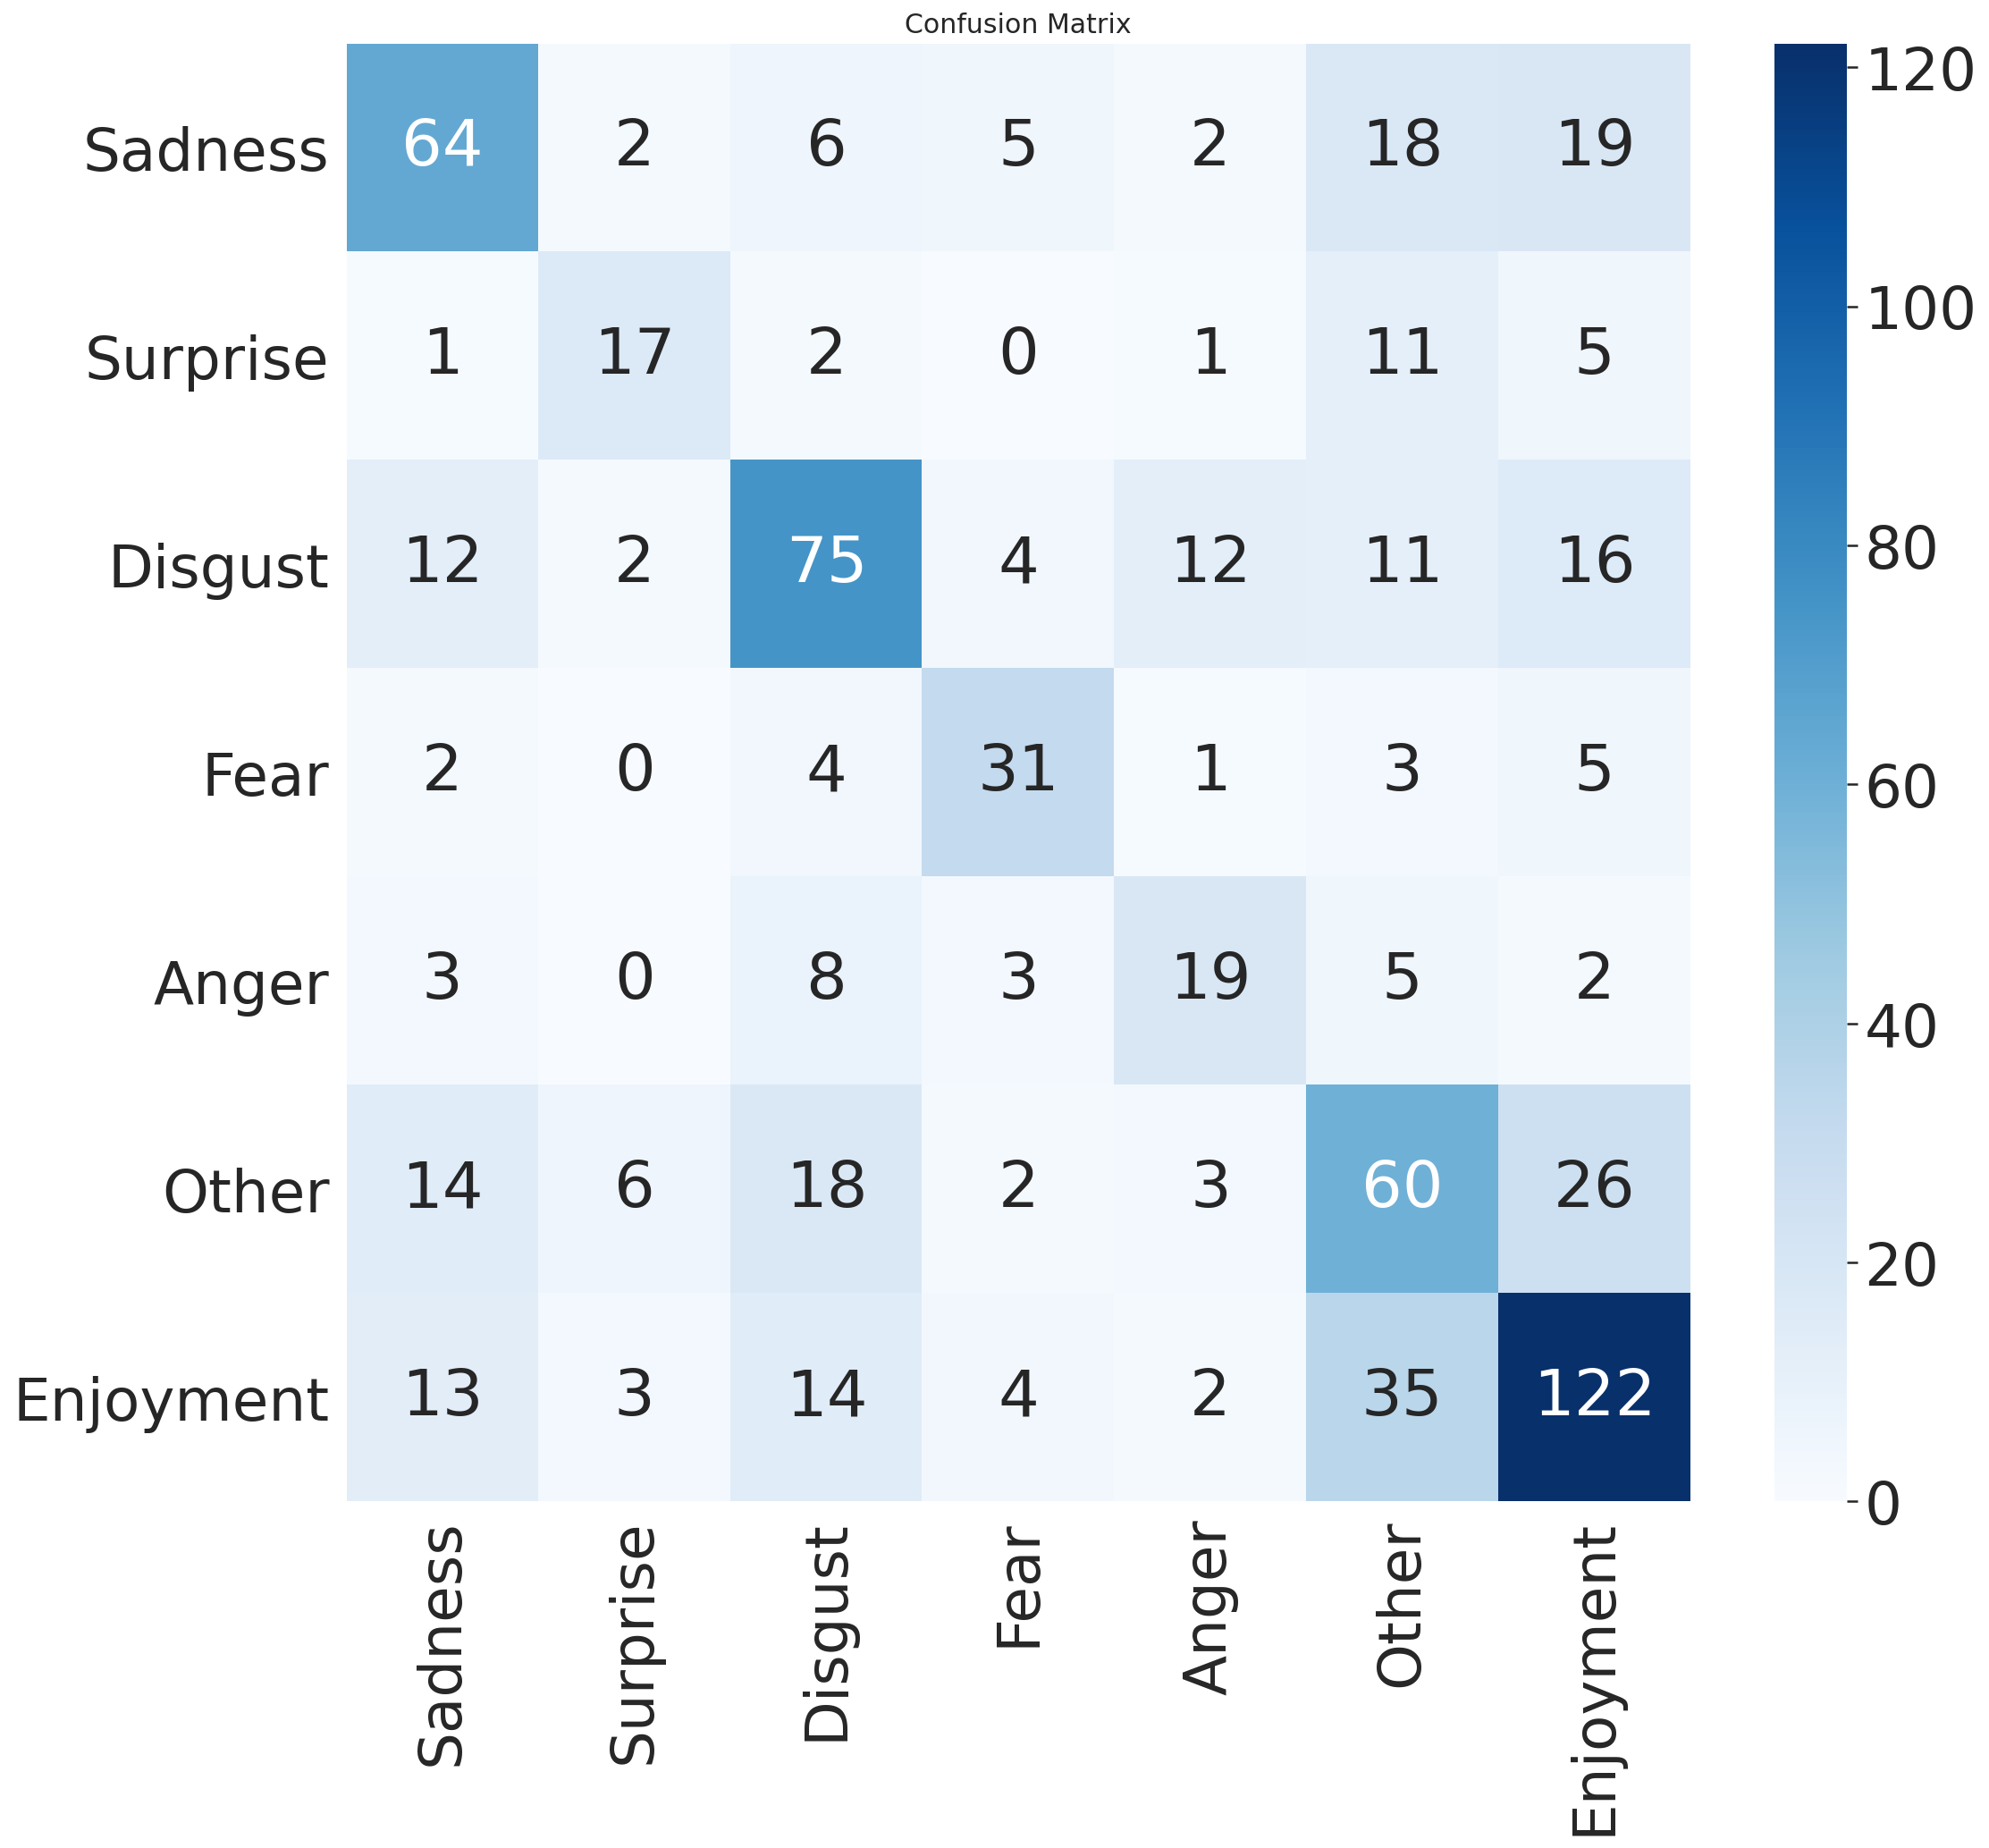

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ve ma tran nham lan
plt.figure(figsize=(15,15))
df_cm = pd.DataFrame(cf, index = target_names,
                  columns = target_names)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'15'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

sns.heatmap(df_cm, annot=True, ax=ax, cmap="Blues", fmt="g");  
sns.heatmap(df_cm, annot=False, cmap="Blues",fmt='g', cbar=False, annot_kws={"size": 15})

# Demo Kết Quả Dự Báo

## Phụ

In [ ]:
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, concatenate, Activation
from keras.models import Model
from keras import backend as K
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras

import pandas as pd
import numpy as np

from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

import string
def cleaner_update(text):
    return text.translate(str.maketrans('','', string.punctuation))

In [ ]:
import pickle
# loading
with open('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/VSMEC/embeddings_index.pickle', 'rb') as handle:
    embeddings_index = pickle.load(handle)

with open('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/VSMEC/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
num_words = 10000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

model_lstm_cnn = Sequential()
e = Embedding(10000, 200, weights=[embedding_matrix], input_length=150, trainable=True)
model_lstm_cnn.add(e)
model_lstm_cnn.add(LSTM(300,return_sequences=True))
model_lstm_cnn.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_lstm_cnn.add(GlobalMaxPooling1D())
model_lstm_cnn.add(Dropout(0.2))
model_lstm_cnn.add(Dense(256, activation='relu'))
model_lstm_cnn.add(Dense(7, activation='sigmoid'))
model_lstm_cnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])

model_lstm_cnn.load_weights('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/VSMEC/LSTM_CNN_best_weights.06-0.54227405786514282226562500000000000000000.hdf5')

## Test Demo

In [ ]:
# input
input1 = input()

x_demo = pad_sequences(tokenizer.texts_to_sequences(pd.Series(cleaner_update(input1))), maxlen=155)
y_pred_classify = model_lstm_cnn.predict(x_demo).argmax(axis=-1)

# output
print("Kết quả dự báo: ", y_pred_classify)